In [1]:
from pickup_utilities import *

data = pd.read_csv('../data/complete.csv')
events = pd.read_csv('/home/burned/Events-2012.csv')

acorn_groups = [ ['A','B','C'],         # affluent
                 ['D','E'],             # rising
                 ['F','G','H','I','J'], # comfortable
                 ['K','L','M','N'],     # stretched 
                 ['O','P', 'Q'],        # adversity
                 ['U'] ]                # other

for ii, grp in enumerate(acorn_groups):
    typ = grp.pop()
    col = f'group{ii+1}_sigma'
    data[col]=data[typ+'_sigma']
    for typ in grp:
        data[col] += data[typ+'_sigma']
     

In [2]:
data['datetime'] = pd.to_datetime( data['datetime'] )
data['tstamp'] = data['datetime'].apply( lambda x : f'{x.hour}:{x.minute:02}')

# convert dates/times
events['Date'] = pd.to_datetime( events['Date'] )
events['Time'] = pd.to_datetime( events['Time'] )
events['Start-Time'] = pd.to_datetime( events['Start-Time'] )
events['End-Time'] = pd.to_datetime( events['End-Time'] )
events['Break-Time'] = events['Start-Time'] + (events['End-Time'] - events['Start-Time'])/2


In [3]:
# cal. avg hourly usage
mdata = data.loc[ data['datetime'] >= pd.to_datetime('2012-05-01') ]
means = mdata.groupby(['hour', 'minute']).mean().reset_index()
stds = mdata.groupby(['hour', 'minute']).std().reset_index()

means['tstamp']=means.reset_index().apply(lambda x : f"{int(x['hour'])}:{int(x['minute']):02}",
                                         axis=1)
stds['tstamp']=stds.reset_index().apply(lambda x : f"{int(x['hour'])}:{int(x['minute']):02}",
                                         axis=1)

means = means.set_index('tstamp')
stds = stds.set_index('tstamp')

In [8]:
event = events.iloc[11]

In [9]:
year, month, day = event['Date'].year, event['Date'].month, event['Date'].day
dfevent = data.loc[data['year']==year].loc[data['month']==month].loc[data['day']==day]

dfevent = dfevent.set_index('tstamp')
for name in dfevent.columns:
    if name.endswith('sigma'):
        dfevent[name] = (dfevent[name]-means[name])/stds[name]
        
dfevent = dfevent.reset_index()

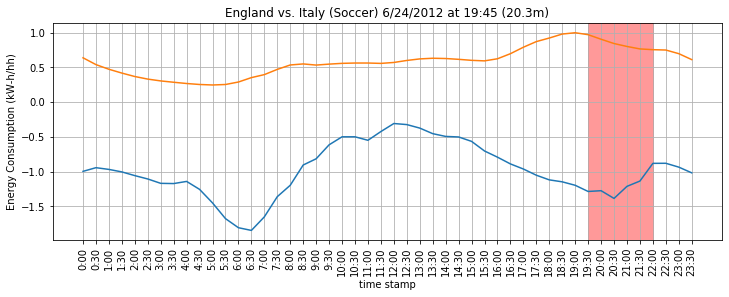

In [10]:

title = (f'{event["Event Name"]} ({event["Sport"]})'
         f' {event["Date"].month}/{event["Date"].day}/{event["Date"].year} at '
         f'{event["Time"].hour}:{event["Time"].minute:02} '
         f'({event["Audience"]}m)')

tsb = f'{event["Start-Time"].hour}:{event["Start-Time"].minute:02}'
tse = f'{event["End-Time"].hour}:{event["End-Time"].minute:02}'

eventPlotter(dfevent, title,
             tsb, tse,evlev = 0)

plt.plot(list(means.index), stds['sigma']/stds['sigma'].max())

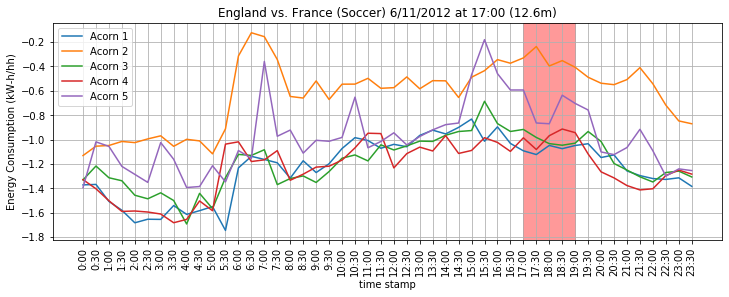

In [97]:
eventPlotterAcorn(dfevent, title, tsb, tse)

In [89]:
event

Sport                                                     Soccer
Event Name                                    England vs. Sweden
Date                                         2012-06-15 00:00:00
Time                                         2019-07-30 20:00:00
Start-Time                                   2019-07-30 20:00:00
End-Time                                     2019-07-30 22:00:00
Broadcaster                                                  BBC
Audience                                                    14.3
Source         https://www.theguardian.com/media/2012/dec/12/...
Notes                                                        NaN
Break-Time                                   2019-07-30 21:00:00
Name: 10, dtype: object